In [1]:
import json
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
from time import time
import io
import re

import pickle
from csv import reader
import matplotlib.pyplot as plt
%matplotlib inline

import regex as re
from newspaper import Article 
import requests

In [2]:
# import tensorflow as tf
# import numpy as np
# import pandas as pd 
# import regex as re
# from newspaper import Article 
# import requests

# import matplotlib.pyplot as plt
# %matplotlib inline


In [3]:
# df = pd.read_table("newsArticlesWithLabels.tsv")
# dataset from https://deepblue.lib.umich.edu/data/concern/data_sets/8w32r569d?locale=en

# df['article'] = df['url']

# def getArticle(url):
#     try:
#         article = Article(url)
#         article.download()
#         article.parse()
#         return(article.text)
#     except:
#         return("badurl")

# df['article'] = df.apply(lambda row: getArticle(row.url), axis = 1) 
# df.to_csv("articledata.csv", sep='\t')


In [4]:
data = pd.read_table("articledata.csv", sep='\t', index_col=0)
data.head()

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...


In [5]:
data = data[data.article != 'badurl']
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(16590, 8)

In [6]:
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...
...,...,...,...,...,...,...,...,...
16585,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...
16586,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ..."
16587,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...
16588,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...


In [7]:
data = data.drop(8)

In [8]:
# rex = "tics cited by Mayors Against Illegal Guns.  Advertisement  For more than two decades, the state has kept centralized records on people who are ineligible under state law to possess firearms for mental health reasons. But because of privacy concerns, as well as differences in state and federal reporting standards, it took years for the state to begin sharing them.  California also goes beyond federal law in trying to keep guns out of the hands of the mentally ill. The state bans firearms possession for five years after someone is placed on a 72-hour psychiatric commitment.  Advertisement  One of the main obstacles in developing the federal mental health database for the background check system is confusion over who should be included. The law says the database should include people who have been judged \xe2\x80\x9cmentally defective.\xe2\x80\x9d  \xe2\x80\x9cNot only is that term highly offensive, it\xe2\x80\x99s completely outdated,\xe2\x80\x9d said Ron Honberg, policy director at the National Alliance on Mental Illness. \xe2\x80\x9cI think there\xe2\x80\x99s a lack of clarity, so states are all over the map on how to interpret it.\xe2\x80\x9d  Advertisement  In Alabama, for example, state officials decided to submit the names of people who had been involuntarily committed to institutions only when they\xe2\x80\x99d also been found guilty of an \xe2\x80\x9cinappropriate use of firearms\xe2\x80\x9d or shown to be a threat to do so. That turned out to be just 243 people, according to a report by Mayors Against Illegal Guns.  Some states have delayed over worries about privacy concerns. Others have antiquated database systems or say they don\xe2\x80\x99t ha"
# ex = r"{}".format(rex)
# print(rex)
# # ex.replace(r'\\x.{2}', ' ') 
# # ex.replace(r'\x[0-9A-F]{2}', ' ') 
# # re.sub(r'â', ' ', ex) 


# newex = re.sub(r'\\x.{2}', '', ex)
# print(newex)

# # newex = ex.replace(r'\\x.{2}', '')
# # newex

In [9]:
# sir = r'foo\x1Dbar'
# print(sir)
# sir = re.sub(r'\\x[0-9A-F]{2}', '', sir)
# print(sir)

In [10]:
badchars = ["\n", "/", "%.{2}", "â", "</s>"]
# ,"\\"
# for i in badchars:
#     data['article'] = data.apply(lambda row: row.replace(i, " "), axis = 1) 

for i in badchars:
    data['article'] = data['article'].str.replace(i, " ")


<ipython-input-10-589aad3063b3>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['article'] = data['article'].str.replace(i, " ")


In [11]:
# sir = "ewdhwrt<div>wfethnwb<s>werfrth</s>5g5ehbtg</div>"
# print(sir)
# sir = re.sub(r'<[^>]*>', '', sir)
# print(sir)

sir = 'foo\x1Dbar'
print(sir)
sir = re.sub(r'\\x[0-9A-F]{2}', '', sir)
print(sir)

foobar
foobar


In [12]:

    
# for i in range(len(data['article']):
#     temp = data['article'][i]
#     temp1 = re.sub(r'\\x[0-9A-F]{2}', '', temp)
#     temp =  r"{}".format(string)
#     temp 
    
data['article'] = data['article'].str.replace(r'\\x.{2},', ' ', regex=True)  # deal with "byte" values (\xe2\x80\x9d )
data['article'] = data['article'].str.replace(r'<[^>]*>', ' ', regex=True)  # deal with html tags values (<div>, <br>)
data['article'] = data['article'].str.replace(r'(?!(([^"]*"){2})*[^"]*$),', '', regex=True)  # deal with '"10,000"' and convert them to '10000' 
data.head()

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark Pew Stateline Staff Writer 21 s...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...


In [13]:
data['length'] = data['article'].str.split()
data['length'] = data['length'].str.len()
data = data.reset_index(drop=True)
data.head()

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article,length
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark Pew Stateline Staff Writer 21 s...,702
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...,1118
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...,1401
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ...",798
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...,947


In [14]:
# for i in range(1000):
#     print(data.loc[i].article)
#     print()

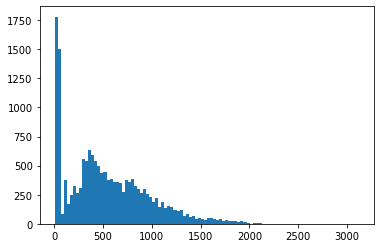

In [15]:
plt.hist(data.length, bins = 100)
plt.show()

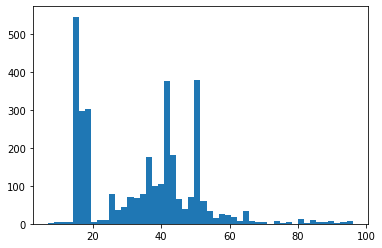

In [16]:
plt.hist(data[data['length']<100].length, bins = 50)
plt.show()

In [17]:
len(data['length'])

16589

In [18]:
len(data[data['length']<100])

3362

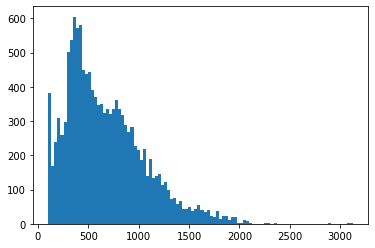

In [19]:
plt.hist(data[data['length']>100].length, bins = 100)
plt.show()

In [20]:
data = data[data['length']>95]
data = data[data['length']<2000]


In [21]:
data.length.quantile([.25, .5, .75])

0.25    374.0
0.50    590.0
0.75    892.0
Name: length, dtype: float64

<AxesSubplot:>

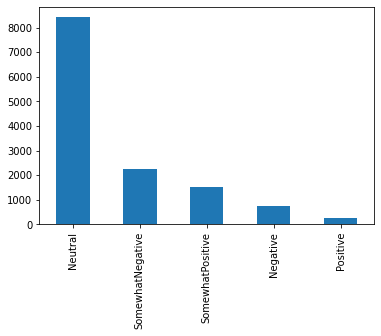

In [22]:
data['democrat.vote'].value_counts().plot.bar()

<AxesSubplot:>

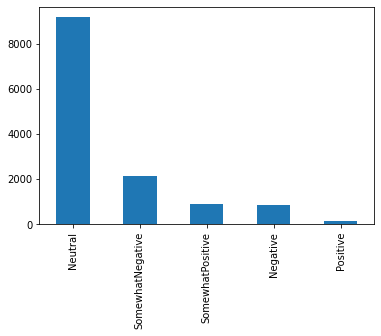

In [23]:
data['republican.vote'].value_counts().plot.bar()

<AxesSubplot:xlabel='democrat.vote,republican.vote'>

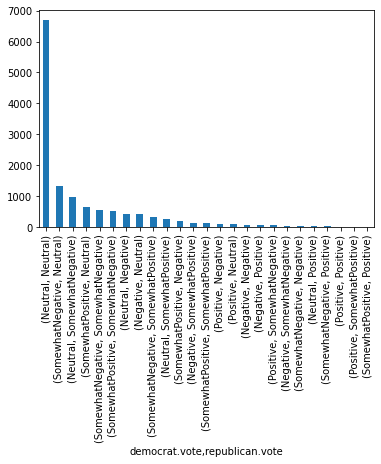

In [24]:
data[['democrat.vote', 'republican.vote']].value_counts().plot.bar()

In [25]:
def numerizeBias(label):
    if label=="SomewhatNegative":
        return -0.5
    if label == "SomewhatPositive":
        return 0.5
    if label == "Negative":
        return -1
    if label == "Positive":
        return 1
    return 0

In [26]:
data["democrat.bias"]= data.apply(lambda row: numerizeBias(row["democrat.vote"]), axis = 1) 
data["republican.bias"]= data.apply(lambda row: numerizeBias(row["republican.vote"]), axis = 1) 

# data["biasmagnitude.democrat"]=data.apply(lambda row: row["democrat.bias"] + abs(row["republican.bias"]), axis = 1)
# data["biasmagnitude.republican"]=data.apply(lambda row: abs(row["democrat.bias"] + abs(row["republican.bias"]), axis = 1)

data["isbiased"] = data.apply(lambda row: 0 if row["democrat.bias"]==0 and row["republican.bias"]==0 else 1, axis = 1)
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article,length,democrat.bias,republican.bias,isbiased
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark Pew Stateline Staff Writer 21 s...,702,0.0,0.0,0
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...,1118,0.0,0.0,0
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...,1401,0.0,0.0,0
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ...",798,0.0,0.0,0
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...,947,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16584,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...,768,0.5,-0.5,1
16585,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ...",805,0.5,-0.5,1
16586,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...,896,0.0,0.0,0
16587,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...,751,0.5,-0.5,1


<AxesSubplot:>

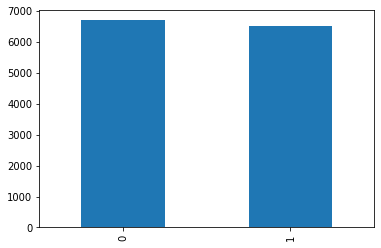

In [27]:
data["isbiased"].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

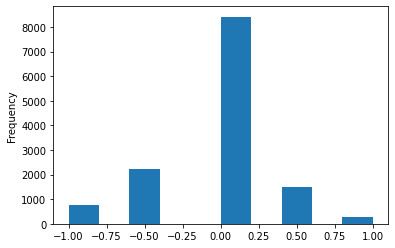

In [28]:
data["democrat.bias"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

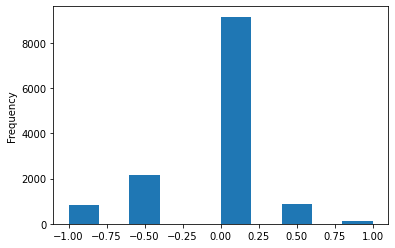

In [29]:
data["republican.bias"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

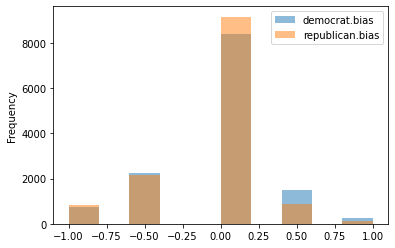

In [30]:
data[["democrat.bias", "republican.bias"]].plot.hist(alpha=0.5)

In [31]:
data["biascategories"] =  data.apply(lambda row: 0 if row["democrat.bias"]==row["republican.bias"] else (1 if row["democrat.bias"]>row["republican.bias"] else -1), axis = 1)
# 1 means bias towards democrats over republicans
# -1 means bias towards republicans over democrats
# 0 equal bias

<AxesSubplot:ylabel='Frequency'>

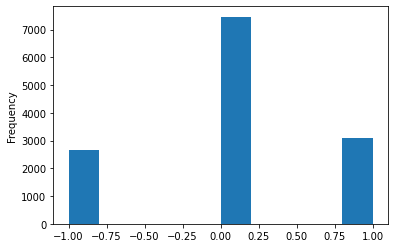

In [32]:
data["biascategories"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

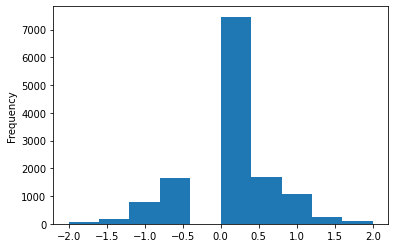

In [33]:
data["biasmagnitude"] =  data.apply(lambda row: 0 if row["democrat.bias"]==row["republican.bias"] else row["democrat.bias"]-row["republican.bias"], axis = 1)
data["biasmagnitude"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

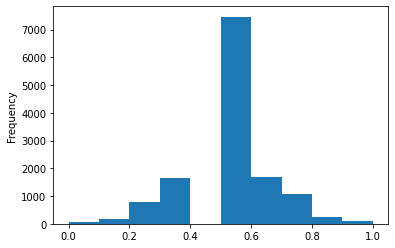

In [34]:
data["biasprob"] =  (data["biasmagnitude"]+2)/4
data["biasprob"].plot.hist()

In [35]:
data.head()
print(data.shape)

(13199, 15)


In [37]:
saved_data = data[["article", 
                   "democrat.bias", 
                   "republican.bias", 
                   "isbiased", 
                   "biascategories",
                   "biasprob"]]
print(saved_data.shape)

(13199, 6)


In [38]:
saved_data.isna().sum()

article            0
democrat.bias      0
republican.bias    0
isbiased           0
biascategories     0
biasprob           0
dtype: int64

In [ ]:
# data["biasedforeveryone"] =  data.apply(lambda row: -99 if row["democrat.bias"]>=0 and row["republican.bias"]>=0 else 0, axis = 1)
# # high value of biasdiff means high bias towards democrats and against republicans
# # low (negative) value of biasdiff means high bias towards republicans and democrats
# data["biasedforeveryone"].plot.hist()

In [39]:
saved_data = saved_data.reset_index(drop=True)

In [40]:
saved_data.to_csv("biaseddata.csv", sep='\t')
